In [116]:
import pandas as pd

In [117]:
df3 = pd.read_excel(r"C:/Users/smp/OneDrive - Grupo JJChicolino/THE POWER/PROYECTOFINALEDA/data/raw/presupuesto2024.xlsx")


In [118]:
df3.sample(5)

,Cod. Empresa,Cod. Macrofamilia,Macrofamilia,Cod.Famila,Familia,Cod.Subfamilia,Subfamilia,Tipo Cliente,Ventas (€),Margen (€),...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
143,1,MF6,Envases y Embalajes,F34,Sacos y Mallas Tejidas,070,SACOS TEJIDOS Y BIG-BAGS,10,1502.747368,NaN,...,0.069538,0.088658,0.034062,0.043516,0.046094,0.104190,0.099323,0.115589,0.071314,0.210134
188,5,MF8,Maquinaria y SAT,F35,Consumibles SAT,ECB,REPUESTOS ECONOMY BAG,10,457.849636,NaN,...,0.147747,0.001906,0.017534,0.007850,0.002885,0.037672,0.003449,0.004646,0.010884,0.742626
148,1,MF9,Reciclaje y valorización de Residuos,F4,Chatarra y Residuos,170,FAMILIA RESIDUOS INTERNOS,11,0.000000,NaN,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
448,21,MFR04,Marine,FR04A,Acuicultura y pesca,AP5,"ACUICULTURA ""BRAQUETS""",10,0.000000,NaN,...,0.089274,0.076108,0.078175,0.121518,0.044120,0.099526,0.092555,0.080900,0.106253,0.060077
280,5,MF6,Envases y Embalajes,F15,Envases Plasticos Rigidos,151,ENVASES ESPECIALES: CAJA DEPURACION,10,6232.800000,NaN,...,0.073433,0.056096,0.074549,0.077983,0.081264,0.071145,0.080640,0.086465,0.128392,0.133681


In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cod. Empresa       505 non-null    int64  
 1   Cod. Macrofamilia  505 non-null    object 
 2   Macrofamilia       505 non-null    object 
 3   Cod.Famila         505 non-null    object 
 4   Familia            505 non-null    object 
 5   Cod.Subfamilia     505 non-null    object 
 6   Subfamilia         505 non-null    object 
 7   Tipo Cliente       505 non-null    int64  
 8   Ventas (€)         505 non-null    float64
 9   Margen (€)         0 non-null      float64
 10  Unidades           505 non-null    float64
 11  mes                0 non-null      float64
 12  % Margen           0 non-null      float64
 13  Enero              505 non-null    float64
 14  Febrero            505 non-null    float64
 15  Marzo              505 non-null    float64
 16  Abril              505 non

## Limpiar y homogeneizar los nombres de columnas

In [120]:
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
df3.columns

Index(['cod_empresa', 'cod_macrofamilia', 'macrofamilia', 'codfamila',
       'familia', 'codsubfamilia', 'subfamilia', 'tipo_cliente', 'ventas_(€)',
       'margen_(€)', 'unidades', 'mes', '%_margen', 'enero', 'febrero',
       'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre',
       'octubre', 'noviembre', 'diciembre'],
      dtype='object')

## Transformar columnas de meses en filas (de formato ancho a largo)




-Convertir columnas de meses en filas

In [127]:
print(df3.columns.tolist())

['cod_empresa', 'cod_macrofamilia', 'macrofamilia', 'codfamila', 'familia', 'codsubfamilia', 'subfamilia', 'tipo_cliente', 'ventas_(€)', 'margen_(€)', 'unidades', 'mes', '%_margen', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']


In [130]:
id_vars = [
    'cod_empresa', 'cod_macrofamilia', 'macrofamilia', 'codfamila', 'familia',
    'codsubfamilia', 'subfamilia', 'tipo_cliente', 'ventas_(€)', 'margen_(€)',
    'unidades', 'mes', '%_margen'
]

In [131]:
value_vars = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

In [132]:
df3 = df3.melt(
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='mes',
    value_name='presupuesto_mes'
)

In [133]:
df3_melted['mes'] = df3_melted['mes'].str.lower()

In [134]:
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cod_empresa       6060 non-null   int64  
 1   cod_macrofamilia  6060 non-null   object 
 2   macrofamilia      6060 non-null   object 
 3   codfamila         6060 non-null   object 
 4   familia           6060 non-null   object 
 5   codsubfamilia     6060 non-null   object 
 6   subfamilia        6060 non-null   object 
 7   tipo_cliente      6060 non-null   int64  
 8   ventas_(€)        6060 non-null   float64
 9   margen_(€)        0 non-null      float64
 10  unidades          6060 non-null   float64
 11  mes               6060 non-null   object 
 12  %_margen          0 non-null      float64
 13  mes               6060 non-null   object 
 14  presupuesto_mes   6060 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 710.3+ KB


## Histograma 

In [141]:
import matplotlib.pyplot as plt

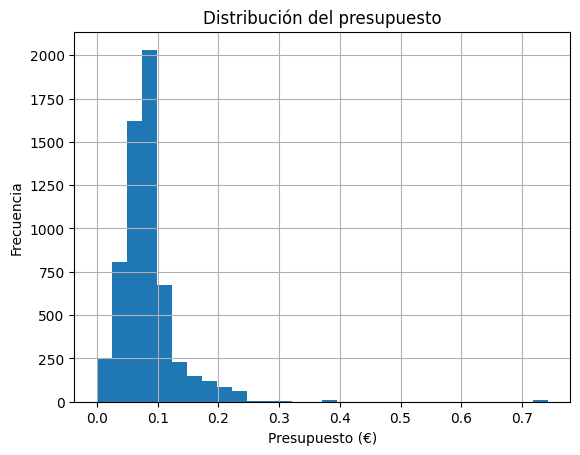

In [142]:
df3['presupuesto_mes'].hist(bins=30)
plt.title('Distribución del presupuesto')
plt.xlabel('Presupuesto (€)')
plt.ylabel('Frecuencia')
plt.show()

## Boxplots

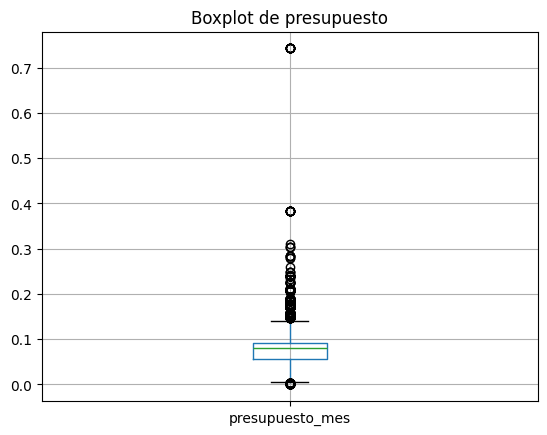

In [143]:
df3.boxplot(column=['presupuesto_mes'])
plt.title('Boxplot de presupuesto')
plt.show()

## Guardar cambios realizados

In [137]:
df3.to_excel("C:/Users/smp/OneDrive - Grupo JJChicolino/THE POWER/PROYECTOFINALEDA/data/output/presupuesto2024_limpio.xlsx", index=False)